In [24]:
import pandas as pd
import glob as glob
import synapseclient
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec
from __future__ import division
%matplotlib inline

plt.rcParams["font.family"] = "helvetica"

tableau10 = [(78, 121, 167), (242, 142, 43), (225, 87, 89),
             (118, 183, 178), (89, 161, 79), (237, 201, 72),
             (176, 122, 161), (225, 157, 167), (156, 117, 95),
             (186, 176, 172)]
for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.)    

# GENIE germline filtering
## Variants designated as common by vcf2maf v1.6.12
The common variants filter in VCF2MAF removes variants if the allele count across any ExAC subpopulation is greater than 10. It should be noted that a whitelist was applied to not consider likely somatic events, even if they were found in ExAC. Documentation behind the motivation for such a filter can be found here: https://github.com/ckandoth/Genie/blob/master/analyses/germline_filtering/readme 
<br><br>
In this IPython notebook we will explore the allelic fractions of variants filtered by our common variant filter. 
<br><br>
GENIE VCFs were annotated with VCF2MAF v1.6.12: <br>
source: https://github.com/mskcc/vcf2maf/blob/v1.6.12/docs/vep_maf_readme.txt

The following was generated on GENIE release 0.6: https://www.synapse.org/#!Synapse:syn7887009

## Results:
GENIE contains 117,589 variants across all centers and 6128 (5.21%) are removed by our suggested common variant filter. The distribution of variant allele fraction of variants filtered and not filtered are as expected, with filtered variants having a clear park at ~ 0.5 and remaining variants having a relatively uniform distribution at lower allele fractions. 
<br><br>
Confidence in somatic calls at potential germline sites is of concern with project GENIE. ExAC minor allele frequencies were plotted for all sites which appeared in ExAC that both passed and failed our common variants filter. Variants which pass are, for the most part, rarer than 1 in 10,000 alleles. 
<br><br>
The effect of our common variants filter by allelic fraction was broken down by center. 

<a id='table.of.contents'></a>
## Table of Contents
1. <a href='#all.data'>Allele fraction of all variants in GENIE, pre-filter</a>
2. <a href='#filter.data'>Allele fractions of common and uncommon variants in GENIE, post-filter</a>
4. <a href='#exac.data'>Allele fraction plots for ExAC hits</a>
5. <a href='#stats.data'>Summary statistics, by institution</a>

In [33]:
#mkdir -p current_release; cd current_release/
#synapse get -r syn7887009

df = pd.read_csv('current_release/data_mutations_extended.txt', 
    sep = '\t', comment = '#', low_memory = False)

In [34]:
# Prep dataframe to handle allelic fraction
df['t_alt_count'] = pd.to_numeric(df['t_alt_count'], errors='coerce').fillna(0)
df['t_depth'] = pd.to_numeric(df['t_depth'], errors='coerce').fillna(0)
df['i_tumor_f'] = df['t_alt_count'].divide(df['t_depth'])
df['i_tumor_f'] = df['i_tumor_f'].fillna(0)

<a id='all.data'></a>
## 1. How many variants are in GENIE and what fraction of them are filtered by our common variants filter?
<a href='#table.of.contents'>Return to top</a><br>

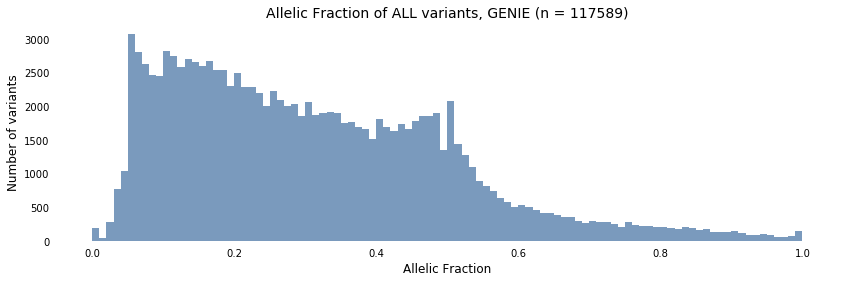

In [35]:
plt.figure(figsize=(14,4))

ax = plt.subplot(111)

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")    

plt.hist(df['i_tumor_f'], 100, facecolor = tableau20[0], alpha = 0.75) 
plt.grid(False)

plt.title('Allelic Fraction of ALL variants, GENIE (n = ' + str(len(df)) + ')', fontsize = 14)
plt.xlabel('Allelic Fraction', fontsize = 12)
plt.ylabel('Number of variants', fontsize = 12)

plt.savefig('figures/2.1.GENIE_AF.pdf', bbox_inches = 'tight')
plt.show()

In [36]:
idx_common = df['FILTER'] == 'common_variant'
df_keep = df[~idx_common]
df_reject = df[idx_common]

print ''
print 'GENIE has a total of', str(len(df)), 'variants across all centers'
print 'and a total of', str(len(df_reject)), 'variants are filtered by our common variant filter.'
print 'This constitutes', str(round(len(df_reject)/len(df)*100, 2)) + '% of all of our variants'


GENIE has a total of 117589 variants across all centers
and a total of 6128 variants are filtered by our common variant filter.
This constitutes 5.21% of all of our variants


<a id='filter.data'></a>
## 2. What does the distribution of allelic fractions look like for variants that were filtered and not filtered?
<a href='#table.of.contents'>Return to top</a><br>

### Allelic fraction of variants that pass our common variants filter

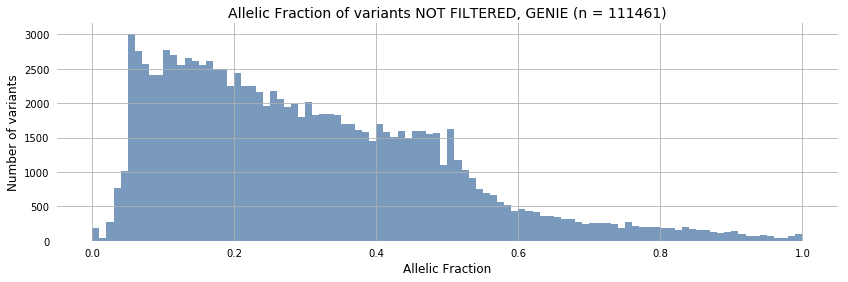

In [37]:
plt.figure(figsize=(14,4))

ax = plt.subplot(111)

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")    

plt.hist(df_keep['i_tumor_f'], 100, facecolor = tableau20[0], alpha = 0.75) 
plt.grid(True)

plt.title('Allelic Fraction of variants NOT FILTERED, GENIE (n = ' + str(len(df_keep)) + ')', fontsize = 14,**hfont)
plt.xlabel('Allelic Fraction', fontsize = 12, **hfont)
plt.ylabel('Number of variants', fontsize = 12, **hfont)

plt.savefig('figures/2.2.GENIE_AF-not_filtered.pdf', bbox_inches = 'tight')
plt.show()

### Allelic fraction of variants that fail our common variants filter

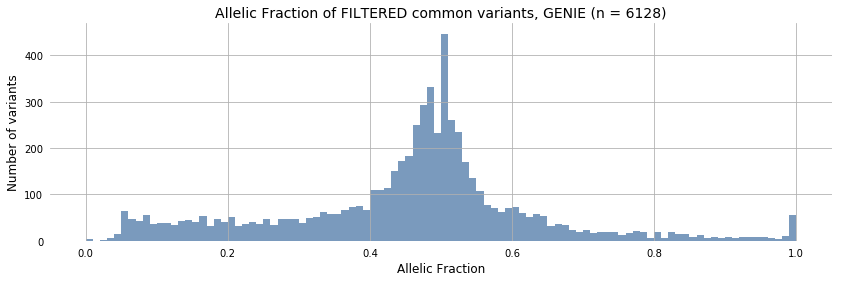

In [38]:
plt.figure(figsize=(14,4))

ax = plt.subplot(111)

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")    

plt.hist(df_reject['i_tumor_f'], 100, facecolor = tableau20[0], alpha = 0.75) 
plt.grid(True)

plt.title('Allelic Fraction of FILTERED common variants, GENIE (n = ' + str(len(df_reject)) + ')', 
          fontsize = 14, **hfont)
plt.xlabel('Allelic Fraction', fontsize = 12, **hfont)
plt.ylabel('Number of variants', fontsize = 12, **hfont)

plt.savefig('figures/2.2.GENIE_AF-filtered.pdf', bbox_inches = 'tight')
plt.show()

<a id='exac.data'></a>
## 3. What is the minor allele frequency of these variants that are in ExAC?
<a href='#table.of.contents'>Return to top</a><br>

We plot the ExAC_AF_Adj. Due to the incredibly small values of these minor allele frequencies and by virtue of some being many orders of magnitude apart, we plot the negative log value: https://xkcd.com/1162/. Allele frequency is calculated by ExAC on an individual basis based on the called genotypes that could contain that variant, with some filtering. Read the ExAC paper to learn more - http://exac.broadinstitute.org/
<br><br>
Benchmarks were added to show the allele frequency for events that would be observed in 1 in 100k (1 e-05), 10k (0.0001), 1k (0.001), and 100 (0.01) alleles. 
<br><br>
<b>Results:</b> We see that <i>most</i> variants observed in GENIE that appear in ExAC are very rare variants, observed at only 1 in 100,000 alleles across the population. In fact, many are even observed less commonly than 1 in 10,000 alleles. Variants of this rarity are our <i>likely</i> somatic candidates. Filtered variants appear to be much more common in ExAC.

### ExAC MAF of variants NOT FILTERED (if applicable)
We plot the ExAC MAF of variants remaining after our common variants filter, if applicable. 

In [39]:
idx_common = df['FILTER'] == 'common_variant'
df_keep = df[~idx_common]
df_reject = df[idx_common]

In [40]:
idx_exac = (df_keep['ExAC_AF_Adj'].isnull()) | (df_keep['ExAC_AF_Adj'] == 0)
df_keep_exac = df_keep[~idx_exac]

print 'Our common variants filter did not remove', str(len(df_keep)), \
    'variants out of the', str(len(df)), 'variants in GENIE.' 
print 'Of these variants,', str(len(df_keep_exac)), 'are observed in ExAC. We plot their allele frequencies.'

maf_keep = np.log10(df_keep_exac['ExAC_AF_Adj'])*-1
maf_keep.replace(to_replace=np.inf, value=np.NaN, inplace = True)
maf_keep = maf_keep.fillna(0)

Our common variants filter did not remove 111461 variants out of the 117589 variants in GENIE.
Of these variants, 16651 are observed in ExAC. We plot their allele frequencies.


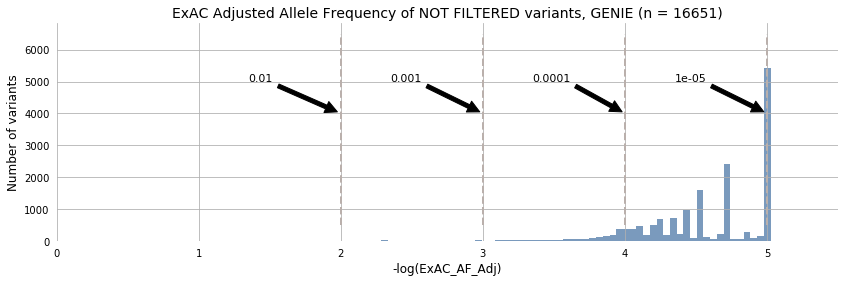

In [42]:
plt.figure(figsize=(14,4))

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")    

plt.hist(maf_keep, 100, facecolor = tableau20[0], alpha = 0.75)
plt.grid(True)

# We plot four vertical lines for benchmarks of population appearence: 1/100, 1/1000, 1/10000, and 1/100000
landmarks = [100, 1000, 10000, 100000]
for landmark_ in landmarks:
    freq = 1/landmark_
    landmark_frequency = np.log10(freq)*-1
    plt.plot((landmark_frequency, landmark_frequency), (500, 6500), '--', 
             color = tableau20[9], linewidth = 2)
    ax.annotate(str(freq), xy=(landmark_frequency, 4000), xytext = (landmark_frequency - 0.65, 5000),
               arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 11)

title_ = 'ExAC Adjusted Allele Frequency of NOT FILTERED variants, GENIE (n = ' + str(len(df_keep_exac)) + ')'
plt.title(title_, fontsize = 14, **hfont)
plt.xlabel('-log(ExAC_AF_Adj)', fontsize = 12, **hfont)
plt.ylabel('Number of variants', fontsize = 12, **hfont)
plt.xlim([0,5.5])

plt.savefig('figures/2.3.GENIE_ExAC_MAF-not_filtered.pdf', bbox_inches = 'tight')
plt.show()

### ExAC MAF of variants FILTERED
We plot the ExAC MAF of variants removed from our common variants filter.

In [43]:
idx_exac = (df_reject['ExAC_AF_Adj'].isnull()) | (df_reject['ExAC_AF_Adj'] == 0)
df_reject_exac = df_reject[~idx_exac]

print 'Our common variants filter removed', str(len(df_reject)), \
    'variants out of the', str(len(df)), 'variants in GENIE.' 
print 'Of these variants,', str(len(df_reject_exac)), 'are observed in ExAC. We plot their allele frequencies.'
# (This should be 100%)

maf_reject = np.log10(df_reject_exac['ExAC_AF_Adj'])*-1
maf_reject.replace(to_replace=np.inf, value=np.NaN, inplace = True)
maf_reject = maf_reject.fillna(0)

Our common variants filter removed 6128 variants out of the 117589 variants in GENIE.
Of these variants, 6128 are observed in ExAC. We plot their allele frequencies.


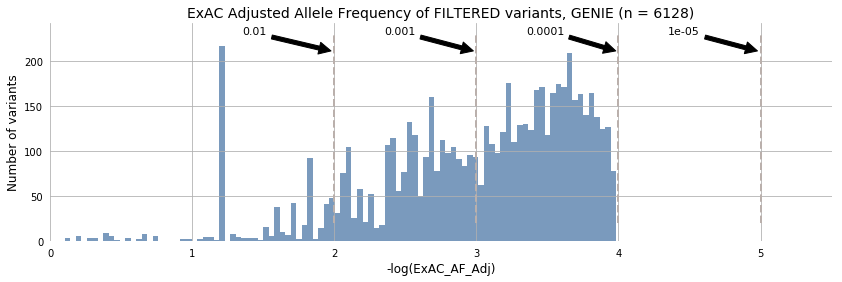

In [45]:
plt.figure(figsize=(14,4))

ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")    

plt.hist(maf_reject, 100, facecolor = tableau20[0], alpha = 0.75)
plt.grid(True)

# We plot four vertical lines for benchmarks of population appearence: 1/100, 1/1000, 1/10000, and 1/100000
landmarks = [100, 1000, 10000, 100000]
for landmark_ in landmarks:
    freq = 1/landmark_
    landmark_frequency = np.log10(freq)*-1
    plt.plot((landmark_frequency, landmark_frequency), (20, 230), '--', 
             color = tableau20[9], linewidth = 2)
    ax.annotate(str(freq), xy=(landmark_frequency, 210), xytext = (landmark_frequency - 0.65, 230),
               arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 11)

title_ = 'ExAC Adjusted Allele Frequency of FILTERED variants, GENIE (n = ' + str(len(df_reject_exac)) + ')'
plt.title(title_, fontsize = 14, **hfont)
plt.xlabel('-log(ExAC_AF_Adj)', fontsize = 12, **hfont)
plt.ylabel('Number of variants', fontsize = 12, **hfont)
plt.xlim([0,5.5])

plt.savefig('figures/2.3.GENIE_ExAC_MAF-filtered.pdf', bbox_inches = 'tight')
plt.show()

<a id='stats.data'></a>
## 4. Common variant filtering, by center
<a href='#table.of.contents'>Return to top</a><br>

We are interested in looking at the variant allele fraction of variants from each center, before and after filtering. 
We create a figure of plots before and after filtering and report some summary statistics. For the categories of all variants, filtered variants, and unfiltered variants we report the following summary statistics:

1. Total number of samples reported by center
2. Total number of variants reported by center
3. Mean variant allele fraction
4. Median variant allele fraction
5. Standard deviation of variant allele fraction
6. Number and fraction of variants observed in ExAC
7. Number and fraction of variants pathogenic

Centers: ['VICC', 'MSK', 'GRCC', 'JHH', 'UHN', 'NKI', 'DFCI', 'MDA']

VICC
Reporting summary statistics for center: VICC

Raw data
Total number of samples: 832
Total number of variants: 9261
Mean variant allele fraction: 0.3546
Median variant allele fraction: 0.3592
Standard deviation of variant allele fraction: 0.1958
Number of variants that appear in ExAC: 3317 (35.82%)
Number of variants that appear as pathogenic in ClinVar and somatic: 651 (7.03%)

Remaining variants (POST-FILTERING)
Total number of samples: 831
Total number of variants: 7653
Mean variant allele fraction: 0.3258
Median variant allele fraction: 0.2998
Standard deviation of variant allele fraction: 0.1932
Number of variants that appear in ExAC: 1709 (22.33%)
Number of variants that appear as pathogenic in ClinVar and somatic: 644 (8.42%)

Filtered variants (POST-FILTERING)
Total number of samples: 702
Total number of variants: 1608
Mean variant allele fraction: 0.4917
Median variant allele fraction: 0.4907
Standard deviation of variant allele fraction: 0.1932
Number of variants that ap

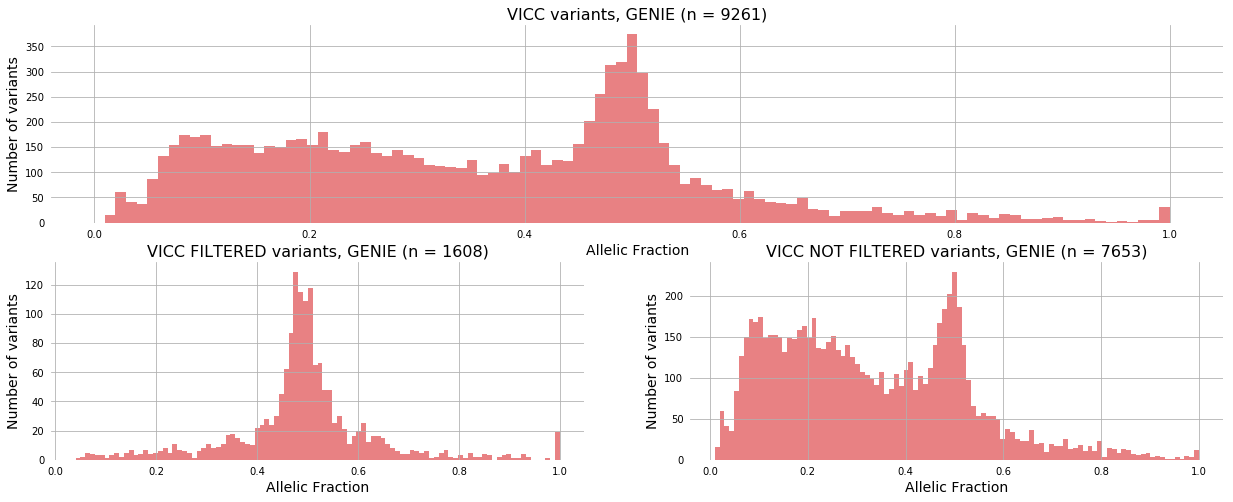



----------------
MSK
Reporting summary statistics for center: MSK

Raw data
Total number of samples: 6664
Total number of variants: 49532
Mean variant allele fraction: 0.2593
Median variant allele fraction: 0.2194
Standard deviation of variant allele fraction: 0.1732
Number of variants that appear in ExAC: 5085 (10.27%)
Number of variants that appear as pathogenic in ClinVar and somatic: 4864 (9.82%)

Remaining variants (POST-FILTERING)
Total number of samples: 6656
Total number of variants: 48974
Mean variant allele fraction: 0.2591
Median variant allele fraction: 0.2193
Standard deviation of variant allele fraction: 0.1731
Number of variants that appear in ExAC: 4527 (9.24%)
Number of variants that appear as pathogenic in ClinVar and somatic: 4855 (9.91%)

Filtered variants (POST-FILTERING)
Total number of samples: 368
Total number of variants: 558
Mean variant allele fraction: 0.2761
Median variant allele fraction: 0.2319
Standard deviation of variant allele fraction: 0.1731
Numbe

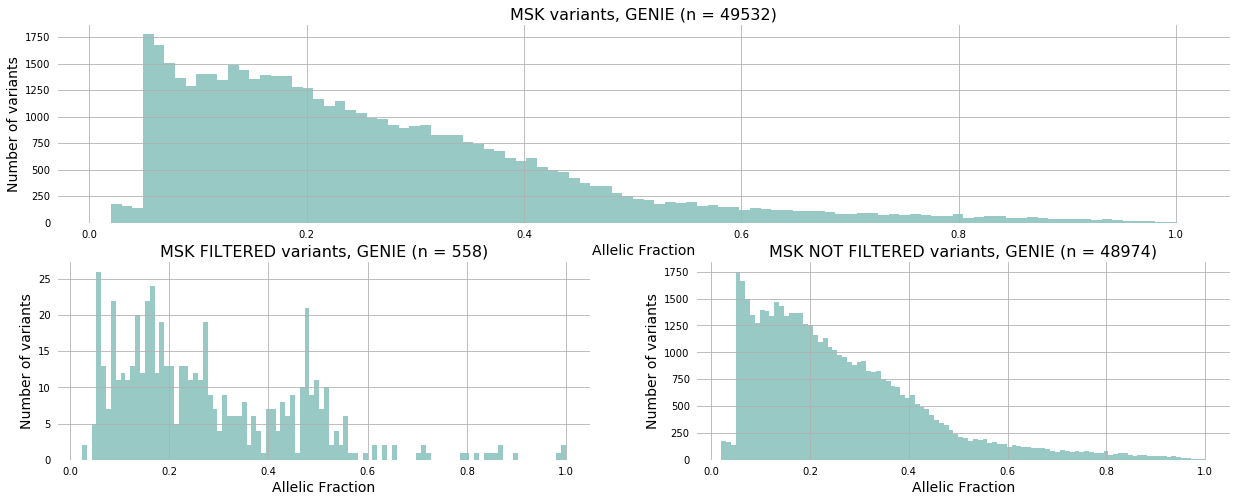



----------------
GRCC
Reporting summary statistics for center: GRCC

Raw data
Total number of samples: 382
Total number of variants: 827
Mean variant allele fraction: 0.4141
Median variant allele fraction: 0.4
Standard deviation of variant allele fraction: 0.225
Number of variants that appear in ExAC: 96 (11.61%)
Number of variants that appear as pathogenic in ClinVar and somatic: 278 (33.62%)

Remaining variants (POST-FILTERING)
Total number of samples: 380
Total number of variants: 807
Mean variant allele fraction: 0.413
Median variant allele fraction: 0.3905
Standard deviation of variant allele fraction: 0.2264
Number of variants that appear in ExAC: 76 (9.42%)
Number of variants that appear as pathogenic in ClinVar and somatic: 278 (34.45%)

Filtered variants (POST-FILTERING)
Total number of samples: 19
Total number of variants: 20
Mean variant allele fraction: 0.4589
Median variant allele fraction: 0.4922
Standard deviation of variant allele fraction: 0.2264
Number of variants t

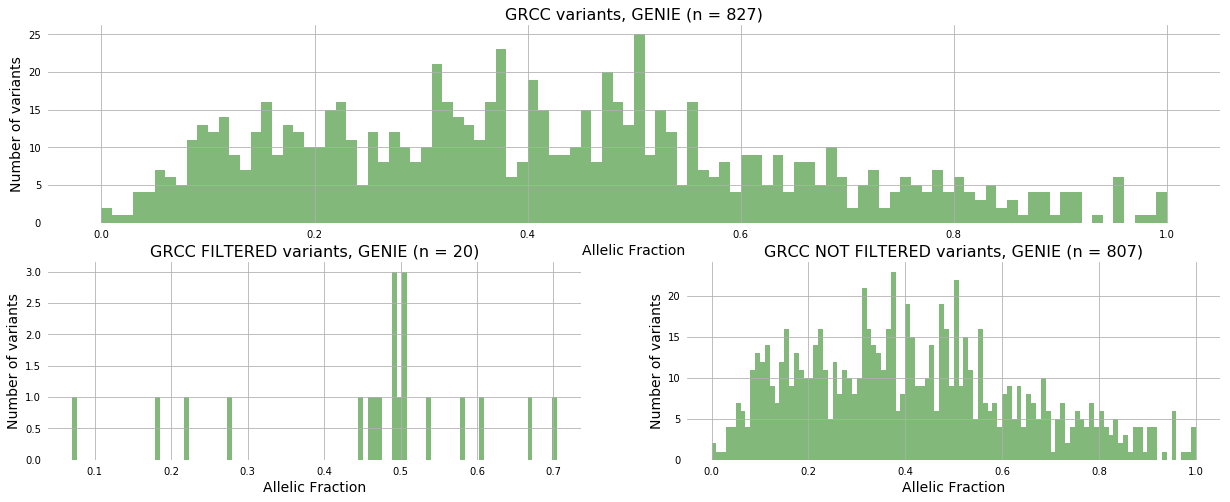



----------------
JHH
Reporting summary statistics for center: JHH

Raw data
Total number of samples: 1068
Total number of variants: 2965
Mean variant allele fraction: 0.3558
Median variant allele fraction: 0.3355
Standard deviation of variant allele fraction: 0.2107
Number of variants that appear in ExAC: 777 (26.21%)
Number of variants that appear as pathogenic in ClinVar and somatic: 1020 (34.4%)

Remaining variants (POST-FILTERING)
Total number of samples: 1016
Total number of variants: 2348
Mean variant allele fraction: 0.3037
Median variant allele fraction: 0.2685
Standard deviation of variant allele fraction: 0.1935
Number of variants that appear in ExAC: 160 (6.81%)
Number of variants that appear as pathogenic in ClinVar and somatic: 1013 (43.14%)

Filtered variants (POST-FILTERING)
Total number of samples: 470
Total number of variants: 617
Mean variant allele fraction: 0.5544
Median variant allele fraction: 0.5235
Standard deviation of variant allele fraction: 0.1935
Number o

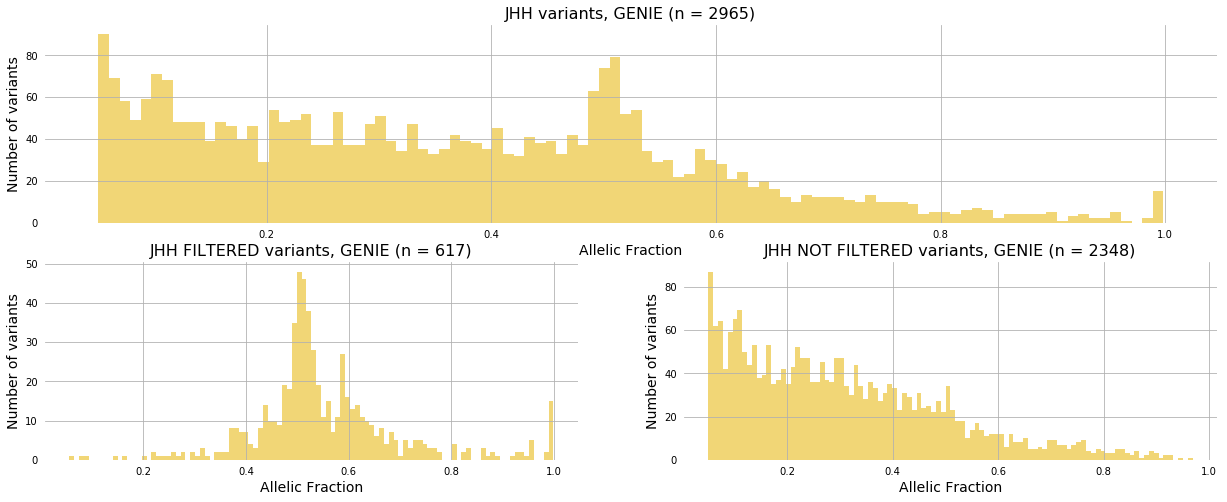



----------------
UHN
Reporting summary statistics for center: UHN

Raw data
Total number of samples: 976
Total number of variants: 2163
Mean variant allele fraction: 0.3608
Median variant allele fraction: 0.3158
Standard deviation of variant allele fraction: 0.2192
Number of variants that appear in ExAC: 154 (7.12%)
Number of variants that appear as pathogenic in ClinVar and somatic: 841 (38.88%)

Remaining variants (POST-FILTERING)
Total number of samples: 967
Total number of variants: 2097
Mean variant allele fraction: 0.361
Median variant allele fraction: 0.3165
Standard deviation of variant allele fraction: 0.2183
Number of variants that appear in ExAC: 88 (4.2%)
Number of variants that appear as pathogenic in ClinVar and somatic: 841 (40.1%)

Filtered variants (POST-FILTERING)
Total number of samples: 31
Total number of variants: 66
Mean variant allele fraction: 0.3542
Median variant allele fraction: 0.2867
Standard deviation of variant allele fraction: 0.2183
Number of variants

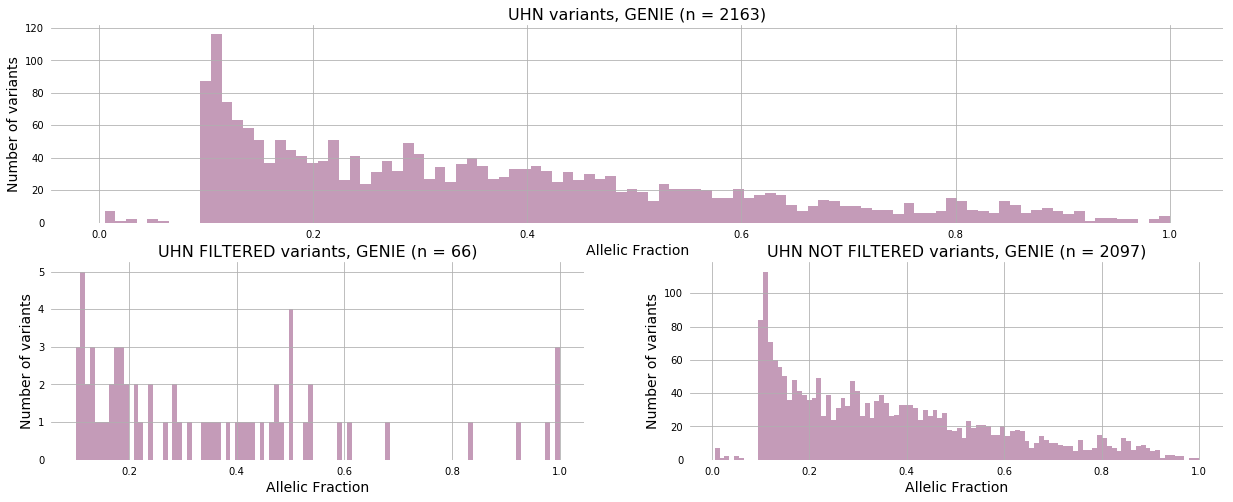



----------------
NKI
Reporting summary statistics for center: NKI

Raw data
Total number of samples: 402
Total number of variants: 856
Mean variant allele fraction: 0.4019
Median variant allele fraction: 0.3774
Standard deviation of variant allele fraction: 0.1953
Number of variants that appear in ExAC: 41 (4.79%)
Number of variants that appear as pathogenic in ClinVar and somatic: 441 (51.52%)

Remaining variants (POST-FILTERING)
Total number of samples: 401
Total number of variants: 842
Mean variant allele fraction: 0.4009
Median variant allele fraction: 0.3757
Standard deviation of variant allele fraction: 0.1951
Number of variants that appear in ExAC: 27 (3.21%)
Number of variants that appear as pathogenic in ClinVar and somatic: 441 (52.38%)

Filtered variants (POST-FILTERING)
Total number of samples: 14
Total number of variants: 14
Mean variant allele fraction: 0.4632
Median variant allele fraction: 0.4432
Standard deviation of variant allele fraction: 0.1951
Number of variants

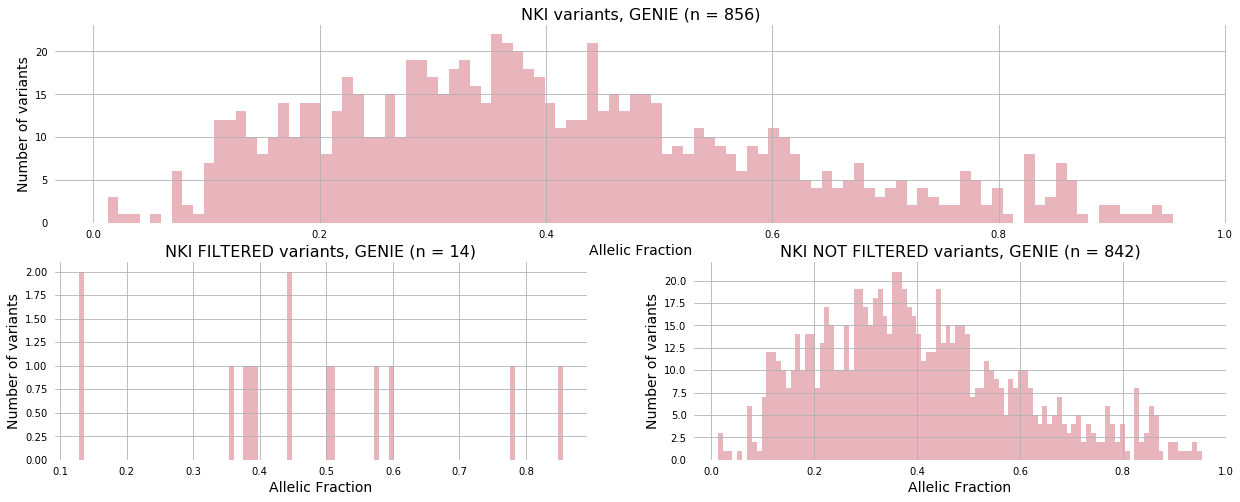



----------------
DFCI
Reporting summary statistics for center: DFCI

Raw data
Total number of samples: 6167
Total number of variants: 50724
Mean variant allele fraction: 0.339
Median variant allele fraction: 0.3304
Standard deviation of variant allele fraction: 0.1979
Number of variants that appear in ExAC: 13579 (26.77%)
Number of variants that appear as pathogenic in ClinVar and somatic: 4086 (8.06%)

Remaining variants (POST-FILTERING)
Total number of samples: 6120
Total number of variants: 47498
Mean variant allele fraction: 0.3315
Median variant allele fraction: 0.3176
Standard deviation of variant allele fraction: 0.1972
Number of variants that appear in ExAC: 10353 (21.8%)
Number of variants that appear as pathogenic in ClinVar and somatic: 4061 (8.55%)

Filtered variants (POST-FILTERING)
Total number of samples: 2148
Total number of variants: 3226
Mean variant allele fraction: 0.4495
Median variant allele fraction: 0.4701
Standard deviation of variant allele fraction: 0.1972


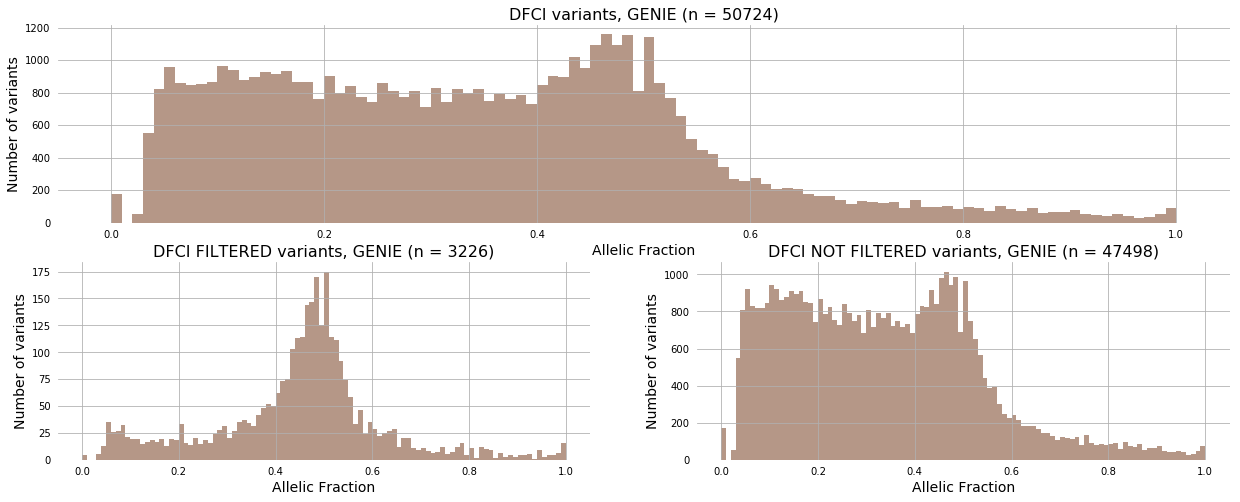



----------------
MDA
Reporting summary statistics for center: MDA

Raw data
Total number of samples: 794
Total number of variants: 1261
Mean variant allele fraction: 0.4
Median variant allele fraction: 0.3702
Standard deviation of variant allele fraction: 0.214
Number of variants that appear in ExAC: 70 (5.55%)
Number of variants that appear as pathogenic in ClinVar and somatic: 793 (62.89%)

Remaining variants (POST-FILTERING)
Total number of samples: 785
Total number of variants: 1242
Mean variant allele fraction: 0.3984
Median variant allele fraction: 0.3689
Standard deviation of variant allele fraction: 0.214
Number of variants that appear in ExAC: 51 (4.11%)
Number of variants that appear as pathogenic in ClinVar and somatic: 793 (63.85%)

Filtered variants (POST-FILTERING)
Total number of samples: 19
Total number of variants: 19
Mean variant allele fraction: 0.503
Median variant allele fraction: 0.5339
Standard deviation of variant allele fraction: 0.214
Number of variants that

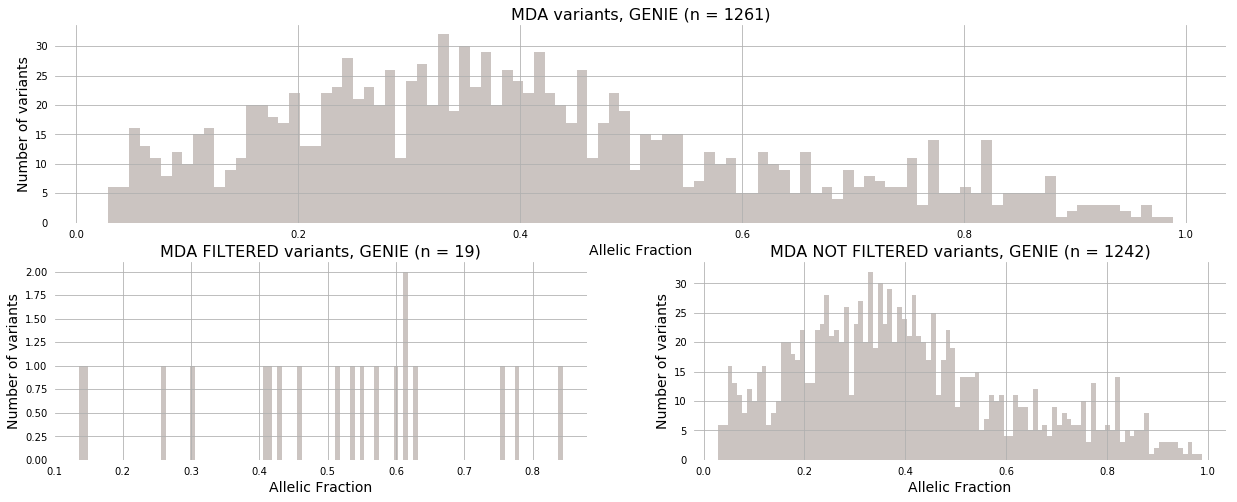



----------------


In [47]:
centers = df['Center'].unique().tolist()
vec = range(0, len(centers))
#colors = [2, 4, 6, 8, 10, 12, 14, 16]
colors = [2, 3, 4, 5, 6, 7, 8, 9]

for i in vec: 
    center_ = centers[i]
    color_ = tableau10[colors[i]]
    print center_
    
    df_center = df[df['Center'] == center_]
    idx_common = df_center['FILTER'] != 'common_variant'
    df_keep = df_center[idx_common]
    df_reject = df_center[~idx_common]
    
    print 'Reporting summary statistics for center:', str(center_)
    print ''
    
    print 'Raw data'
    print 'Total number of samples:', str(len(df_center['Tumor_Sample_Barcode'].unique().tolist())) 
    print 'Total number of variants:', str(len(df_center))
    print 'Mean variant allele fraction:', str(round(df_center['i_tumor_f'].mean(), 4))
    print 'Median variant allele fraction:', str(round(df_center['i_tumor_f'].median(), 4))
    print 'Standard deviation of variant allele fraction:', str(round(df_center['i_tumor_f'].std(), 4))
    
    idx_exac = df_center['ExAC_AF'].isnull()
    df_exac = df_center[~idx_exac]
    print 'Number of variants that appear in ExAC:', str(len(df_exac)), '(' + str(round(len(df_exac)/len(df_center), 4)*100) + '%)'
    
    idx_somatic_clinvar = (df_center['CLIN_SIG'].str.contains('pathogenic') == True) & (df_center['SOMATIC'].str.contains('1') == True)
    df_somatic_clinvar = df_center[idx_somatic_clinvar]
    print 'Number of variants that appear as pathogenic in ClinVar and somatic:', str(len(df_somatic_clinvar)), '(' + str(round(len(df_somatic_clinvar)/len(df_center), 4)*100) + '%)'
    print ''
    
    print 'Remaining variants (POST-FILTERING)'
    print 'Total number of samples:', str(len(df_keep['Tumor_Sample_Barcode'].unique().tolist())) 
    print 'Total number of variants:', str(len(df_keep))
    print 'Mean variant allele fraction:', str(round(df_keep['i_tumor_f'].mean(), 4))
    print 'Median variant allele fraction:', str(round(df_keep['i_tumor_f'].median(), 4))
    print 'Standard deviation of variant allele fraction:', str(round(df_keep['i_tumor_f'].std(), 4))
    
    idx_exac = df_keep['ExAC_AF'].isnull()
    df_exac = df_keep[~idx_exac]
    print 'Number of variants that appear in ExAC:', str(len(df_exac)), '(' + str(round(len(df_exac)/len(df_keep), 4)*100) + '%)'
    
    idx_somatic_clinvar = (df_keep['CLIN_SIG'].str.contains('pathogenic') == True) & (df_keep['SOMATIC'].str.contains('1') == True)
    df_somatic_clinvar = df_keep[idx_somatic_clinvar]
    print 'Number of variants that appear as pathogenic in ClinVar and somatic:', str(len(df_somatic_clinvar)), '(' + str(round(len(df_somatic_clinvar)/len(df_keep), 4)*100) + '%)'
    print ''
    
    print 'Filtered variants (POST-FILTERING)'
    print 'Total number of samples:', str(len(df_reject['Tumor_Sample_Barcode'].unique().tolist())) 
    print 'Total number of variants:', str(len(df_reject))
    print 'Mean variant allele fraction:', str(round(df_reject['i_tumor_f'].mean(), 4))
    print 'Median variant allele fraction:', str(round(df_reject['i_tumor_f'].median(), 4))
    print 'Standard deviation of variant allele fraction:', str(round(df_keep['i_tumor_f'].std(), 4))
    
    idx_exac = df_reject['ExAC_AF'].isnull()
    df_exac = df_reject[~idx_exac]
    print 'Number of variants that appear in ExAC:', str(len(df_exac)), '(' + str(round(len(df_exac)/len(df_reject), 4)*100) + '%)'
    
    idx_somatic_clinvar = (df_reject['CLIN_SIG'].str.contains('pathogenic') == True) & (df_reject['SOMATIC'].str.contains('1') == True)
    df_somatic_clinvar = df_reject[idx_somatic_clinvar]
    print 'Number of variants that appear as pathogenic in ClinVar and somatic:', str(len(df_somatic_clinvar)), '(' + str(round(len(df_somatic_clinvar)/len(df_reject), 4)*100) + '%)'
    print ''
    
    fig = plt.figure(figsize = (21, 8))
    gs = gridspec.GridSpec(2, 2)
    #gs.update(wspace = 0.08, hspace = 0.04)
    
    ax = plt.subplot(gs[0, :])
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
        labelbottom="on", left="off", right="off", labelleft="on")    
    plt.hist(df_center['i_tumor_f'], 100, facecolor = color_, alpha = 0.75) 
    plt.grid(True)
    plt.title(center_ + ' variants, GENIE (n = ' + str(len(df_center)) + ')', fontsize = 16)
    plt.xlabel('Allelic Fraction', fontsize = 14)
    plt.ylabel('Number of variants', fontsize = 14)

    ax = plt.subplot(gs[1, 0])
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
        labelbottom="on", left="off", right="off", labelleft="on")    
    plt.hist(df_reject['i_tumor_f'], 100, facecolor = color_, alpha = 0.75) 
    plt.grid(True)
    plt.title(center_ + ' FILTERED variants, GENIE (n = ' + str(len(df_reject)) + ')', fontsize = 16)
    plt.xlabel('Allelic Fraction', fontsize = 14)
    plt.ylabel('Number of variants', fontsize = 14)

    ax = plt.subplot(gs[1, 1])
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
        labelbottom="on", left="off", right="off", labelleft="on")    
    plt.hist(df_keep['i_tumor_f'], 100, facecolor = color_, alpha = 0.75) 
    plt.grid(True)
    plt.title(center_ + ' NOT FILTERED variants, GENIE (n = ' + str(len(df_keep)) + ')', 
              fontsize = 16, **hfont)
    plt.xlabel('Allelic Fraction', fontsize = 14, **hfont)
    plt.ylabel('Number of variants', fontsize = 14, **hfont)
    
    plt.savefig('figures/2.4.' + center_ + '-common_variants.pdf', bbox_inches = 'tight')
    plt.show()
    
    print ''
    print ''
    print '----------------'